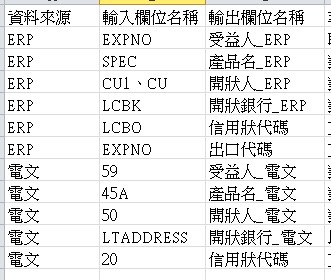

In [35]:
from IPython.display import Image
Image('..\data\img\messageImage_1644203293134.jpg')

# 讀入電文資料

In [36]:
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm

def load_df(path=None):
    cols = [
        '59',#受益人
        '45A',#產品名
        '50',#開狀人
        'LTADDRESS.1',#開狀銀行
        '20',#信用狀代碼
        ]
    df = pd.DataFrame()
    for l in tqdm(sorted(os.listdir(path))):
        d = pd.read_excel(path + l,sheet_name='mt700')[cols]
        d['from'] = l
        df = df.append(d)
    return df.reset_index(drop=True)
df1 = load_df(path='../data/電文資料/p1/')
df2 = load_df(path='../data/電文資料/p2/')
df = df1.append(df2).reset_index(drop=True)
df = df.rename(columns={
    '59':'受益人_電文',
    '45A':'產品名_電文',
    '50':'開狀人_電文',
    'LTADDRESS.1':'開狀銀行_電文',
    '20':'信用狀代碼',
    })
print('電文shape',df.shape)
df

C:\Users\ricky\anaconda3\envs\bert_env\lib\site-packages\ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

電文shape (10237, 6)


,受益人_電文,產品名_電文,開狀人_電文,開狀銀行_電文,信用狀代碼,from
0,"FORMOSA PLASTICS CORPORATION201,TUNG HWA NORTH...",SHIPMENT OFPVC SUSPENSION RESIN S-65D QTY 18 M...,"RYTOIL PETROCHEMICALS LLPBASEMENT 2095, I BLOC...",PUNBINBBAMRD,08761FLC0003220,017-202101-03.xlsx
1,"FORMOSA PLASTICS CORPORATION201, TUNG HWA NORT...","17 MT PVC COPOLYMER RESIN, C-15 AT USD 1470 ...","S R POLYVINYL LTD4261/3, JAI MATA MARKET TRI N...",INDBINBBANDH,OLC0005200038327,017-202101-03.xlsx
2,FORMOSA PLASTICS CORPORATION201. TUNG HWA N. R...,"+TERMS OF SALE: CIF NHAVA SHEVA PORT, INDIA++7...",OSWAL CABLE PRODUCTS PVT LTDA 93/1 WAZIRPUR GR...,CITIINBXAIBD,5545607231,017-202101-03.xlsx
3,"FORMOSA PLASTICS CORPORATION201,TUNG HWA N ROA...","MASS PVC RESIN, B-57QUANTITY 175 MT AT 1300 US...",OJUS PETROCHEMICALS LLPC 289 NIRALA NAGAR LUCK...,ICICINBBACTS,6281MLC00000321,017-202101-03.xlsx
4,NAN YA PLASTICS CORPORATION201 TUN HWA NORTH R...,PHTHALIC ANHYDRIDE (PA)QUANTITY = 306 MT UNIT ...,AHMED SAEED AFIFI FACTORY CO. FORRESINS LTD. P...,NCBKSAJEAXXX,L072875,017-202101-03.xlsx
...,...,...,...,...,...,...
10232,"FORMOSA PLASTICS CORPORATION_x000D_\n201, TUNG...",PVC SUSPENSION RESIN S65D FOR 70MT AT USD 1270...,"MOHAN TRADING CO._x000D_\n19 - DADA COLONY, IN...",KKBKINBBACPC,0251ILF200014400,822-202007-12.xlsx
10233,"FORMOSA PLASTICS CORPORATION_x000D_\n201, TUNG...",70.00 MT (IN 4X20 FT CONTAINERS)_x000D_\nPVC R...,"YASH PACKAGING_x000D_\nPLOT NO. A2/2220, 3RD P...",KKBKINBBACPC,0871ILF200013842,822-202007-12.xlsx
10234,NAN YA PLASTICS CORP_x000D_\n201 TUNG HWA N. R...,EPOXY RESIN_x000D_\nNPEF-178_x000D_\nFOB ANY P...,"ALLCHEM INTERNATIONAL PTY., LTD._x000D_\n4/F, ...",CTCBHKHHAXXX,904IUSN203630002,822-202007-12.xlsx
10235,NAN YA PLASTICS CORP_x000D_\n201 TUNG HWA N. R...,EPOXY RESIN_x000D_\nNPEL-128_x000D_\nCIF SAVAN...,"ALLCHEM INTERNATIONAL PTY., LTD._x000D_\n4/F, ...",CTCBHKHHAXXX,904IUSN203650001,822-202007-12.xlsx


# 讀入ERP資料

In [37]:
台塑出口公司名稱及統編 = pd.read_excel('../data\寶典\台塑出口公司名稱及統編.xlsx').astype(str)
def 去除尾綴(x):
    var = [
        'CORPORATION',
        'CORP.',
        'CO., LTD.',
        'INCORPORATION',
        'CO.,LTD'
    ]
    for i in var:
        x = x.replace(i,'')
    return x
台塑出口公司名稱及統編['公司英文名稱'] = 台塑出口公司名稱及統編['公司英文名稱'].apply(去除尾綴)
台塑出口公司名稱及統編

,代號,公司簡稱,公司統編,公司英文名稱
0,1,台塑塑膠,75708007,FORMOSA PLASTICS
1,2,南亞塑膠,75370905,NAN YA PLASTICS
2,4,台灣化學纖維,58650902,FORMOSA CHEMICALS AND FIBRE
3,6,台塑石化,86522210,FORMOSA PETROCHEMICAL
4,AF,台朔汽車,16745630,FORMOSA AUTOMOBILE SALES
5,AH,台塑旭,16446128,FORMOSA ASAHI SPANDEX
6,AL,台塑大金,70467423,FORMOSA DAIKIN ADVANCED CHEMICALS
7,BM,台塑生醫,80539426,FORMOSA BIOMEDICAL TECHNOLOGY
8,BN,虹京資源,27992242,HONG JING RESOURCES
9,GF,長庚醫學科技,24338670,CHANG GUNG MEDICAL TECHNOLOGY


In [38]:

def load_erp(path=None,sheet_name=None):
    cols = [
        'SPEC',
        'CU1','CU',
        'LCBK',
        'LCNO',
        'EXPNO',
    ]
    df_erp = pd.read_excel(path,sheet_name=sheet_name)[cols]
    def EXPNO映射到受益人(x):
        mapping = dict(zip(台塑出口公司名稱及統編['代號'],台塑出口公司名稱及統編['公司英文名稱']))
        前兩碼 = x[:2]
        if 前兩碼.isalpha():
            return mapping[前兩碼]
        else:
            第一碼 = x[:1]
            return mapping[第一碼]
    df_erp['受益人_ERP'] = df_erp['EXPNO'].apply(EXPNO映射到受益人)
    return df_erp
df_erp1 = load_erp('../data/ERP資料/TB01.202101-06.xlsx','202101-06')
df_erp2 = load_erp('../data/ERP資料/TB01.202007-202106.xlsx','202007-202106')
df_erp = df_erp1.append(df_erp2).reset_index(drop=True)
df_erp['CU'].update(df_erp['CU1'])#這兩個欄位都是指同一件事情
df_erp = df_erp.drop(columns=['CU1'])
df_erp = df_erp.rename(columns={
    'SPEC':'產品名_ERP',
    'CU':'開狀人_ERP',
    'LCBK':'開狀銀行_ERP',
    'LCNO':'信用狀代碼',
    'EXPNO':'出口代碼',
    })
print('ERP shape',df_erp.shape)
df_erp = df_erp[['受益人_ERP','產品名_ERP','開狀人_ERP','開狀銀行_ERP','信用狀代碼','出口代碼']]
df_erp

ERP shape (36182, 6)


,受益人_ERP,產品名_ERP,開狀人_ERP,開狀銀行_ERP,信用狀代碼,出口代碼
0,FORMOSA PLASTICS,PVC RESIN SUSPENSION \nGRADE S-70,RMG POLYVINYL INDIA LTD\n10/1 INDUSTRIAL AREA\...,STATE BANK OF INDIA,0505120IM0000875,11A11G09
1,FORMOSA PLASTICS,"MASS PVC RESIN,GRADE B-57",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95
2,FORMOSA PLASTICS,"PVC SUSPENSION RESIN,\nGRADE S-65",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95
3,FORMOSA PLASTICS,"PVC SUSPENSION RESIN,\nGRADE S-65D",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95
4,FORMOSA PLASTICS,PVC SUSPENSION RESIN \nS-65D,ALPHA POLYMERS,THE FEDERALBANK LTD\nP B NO 20 RAMAKRISHNA ROA...,1287IMLC22754,11A12F88
...,...,...,...,...,...,...
36177,FORMOSA IDEMITSU PETROCHEMICAL,POLYCARBONATE RESIN_x000D_\nTARFLON IR1900CB,"XIAMEN GOLDEN CHEMICALS CO.,LTD._x000D_\nBUILD...","CTBC BANK CO.,LTD XIAMEN BRANCH",868IUSN193450005,RSD9C358
36178,FORMOSA IDEMITSU PETROCHEMICAL,POLYCARBONATE RESIN_x000D_\nTARFLON IV2200R-WW,CHINA XIAMEN CORPORATION,BANK OF CHINA _x000D_\nFUZHOU_x000D_\n(FUJIAN ...,LC0957620003374,RSK06140
36179,PFG FIBER GLASS,PLASTIC BOBBIN_x000D_\n(83.11MMID X 3.3MMT X_x...,"TAEKYOUNG INC._x000D_\n59-2 GASAN-RO, HANRIM-M...",KYONGNAM BANK,M39N8906NS00025,XUA97006
36180,PFG FIBER GLASS,PLASTIC BOBBIN_x000D_\n(60.35MMID-60.15MMID_x0...,"ASIA KANGNAM CO.,LTD._x000D_\n69/1 MOO 6 ,TAMB...",BANK OF AYUDHYA PUBLIC _x000D_\nCOMPANY LIMITED,00001010327362,XUB04031


# 根據信用狀代碼 合併 df(電文) 和 df_erp 

In [39]:
df_merged = pd.merge(df_erp,df,on='信用狀代碼',how='left')
df_merged.to_excel('../data/combined_excel.xlsx')
print(df_merged.shape)
print(df_merged.columns.tolist())
df_merged.head(100)

(42096, 11)
['受益人_ERP', '產品名_ERP', '開狀人_ERP', '開狀銀行_ERP', '信用狀代碼', '出口代碼', '受益人_電文', '產品名_電文', '開狀人_電文', '開狀銀行_電文', 'from']


,受益人_ERP,產品名_ERP,開狀人_ERP,開狀銀行_ERP,信用狀代碼,出口代碼,受益人_電文,產品名_電文,開狀人_電文,開狀銀行_電文,from
0,FORMOSA PLASTICS,PVC RESIN SUSPENSION \nGRADE S-70,RMG POLYVINYL INDIA LTD\n10/1 INDUSTRIAL AREA\...,STATE BANK OF INDIA,0505120IM0000875,11A11G09,"FORMOSA PLASTICS CORPORATION_x000D_\n201, TUNG...",108.50 MT PVC RESIN SUSPENSION GRADE S-70 OF F...,RMG POLYVINYL INDIA LTD_x000D_\n10/1 INDUSTRIA...,SBININBBAFXD,021-20201216-1231.xlsx
1,FORMOSA PLASTICS,"MASS PVC RESIN,GRADE B-57",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95,NaN,NaN,NaN,NaN,NaN
2,FORMOSA PLASTICS,"PVC SUSPENSION RESIN,\nGRADE S-65",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95,NaN,NaN,NaN,NaN,NaN
3,FORMOSA PLASTICS,"PVC SUSPENSION RESIN,\nGRADE S-65D",RUBCHEM INDIA PVT LTD,THE SOUTH INDIAN BANK LTD,FDC0129000052021,11A11J95,NaN,NaN,NaN,NaN,NaN
4,FORMOSA PLASTICS,PVC SUSPENSION RESIN \nS-65D,ALPHA POLYMERS,THE FEDERALBANK LTD\nP B NO 20 RAMAKRISHNA ROA...,1287IMLC22754,11A12F88,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,FORMOSA PLASTICS,PVC RESIN S-70,POLYGROUP TRADING LIMITED,BANK OF CHINA (HONG KONG) LIMITED,265B20LC008918,11G11C95,FORMOSA PLASTICS CORPORATION,"1) 220 MTS OF PVC RESIN S-60 (USD1,155.00 PER ...",POLYGROUP TRADING LIMITED,BKCHHKHHCXXX,017-202007-12.xlsx
96,FORMOSA PLASTICS,PVC RESIN S-70,POLYGROUP TRADING LIMITED,BANK OF CHINA (HONG KONG) LIMITED,265B20LC008918,11G11C96,FORMOSA PLASTICS CORPORATION,"1) 220 MTS OF PVC RESIN S-60 (USD1,155.00 PER ...",POLYGROUP TRADING LIMITED,BKCHHKHHCXXX,017-202007-12.xlsx
97,FORMOSA PLASTICS,PVC RESIN S-60,POLYGROUP TRADING LIMITED,BANK OF CHINA (HONG KONG) LIMITED,265B20LC008918,11G11C97,FORMOSA PLASTICS CORPORATION,"1) 220 MTS OF PVC RESIN S-60 (USD1,155.00 PER ...",POLYGROUP TRADING LIMITED,BKCHHKHHCXXX,017-202007-12.xlsx
98,FORMOSA PLASTICS,PVC RESIN S-70,POLYGROUP TRADING LIMITED,BANK OF CHINA (HONG KONG) LIMITED,265B20LC008918,11G11C98,FORMOSA PLASTICS CORPORATION,"1) 220 MTS OF PVC RESIN S-60 (USD1,155.00 PER ...",POLYGROUP TRADING LIMITED,BKCHHKHHCXXX,017-202007-12.xlsx
